___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import pandas as pd

import numpy as np
import datetime
from datetime import datetime, date, time, timezone
import seaborn as sns
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [2]:
start = date(2006,1,1)
end = date(2016,1,1)

BAC = data.DataReader("BAC",'yahoo',start,end)

ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/BAC/history (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CFEA67B860>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [ ]:
CG = data.DataReader("C",'yahoo',start,end)

In [ ]:
GS = data.DataReader("GS",'yahoo',start,end)

In [3]:
JPM = data.DataReader("JPM",'yahoo',start,end)

ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/JPM/history (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CFEA79FBA8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [4]:
MS = data.DataReader("MS",'yahoo',start,end)

ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/MS/history (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CFEA7AAE10>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [5]:
WFC = data.DataReader("WFC",'yahoo',start,end)


ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/WFC/history (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CFEA79FAC8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [32]:
WFC.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,31.600000,31.975000,31.195000,31.900000,23.077190,11016400
2006-01-04,31.799999,31.820000,31.365000,31.530001,22.809519,10870000
2006-01-05,31.500000,31.555000,31.309999,31.495001,22.784204,10158000
2006-01-06,31.580000,31.775000,31.385000,31.680000,22.918036,8403800
2006-01-09,31.674999,31.825001,31.555000,31.674999,22.914423,5619600


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**


In [33]:
tickers = ['BAC','CG','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [34]:
bank_stocks = pd.concat([BAC,CG,GS,JPM,MS,WFC],keys=tickers,axis=1)

** Set the column name levels (this is filled out for you):**

In [35]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [36]:
bank_stocks.head(1)

Bank Ticker        BAC                                                   \
Stock Info        Open   High        Low      Close Adj Close    Volume   
Date                                                                      
2006-01-03   46.919998  47.18  46.150002  47.080002  37.00008  16296700   

Bank Ticker     CG                                        ...            MS  \
Stock Info    Open        High         Low       Close    ...           Low   
Date                                                      ...                 
2006-01-03   490.0  493.799988  481.100006  492.899994    ...     56.740002   

Bank Ticker                                  WFC                        \
Stock Info       Close  Adj Close   Volume  Open    High     Low Close   
Date                                                                     
2006-01-03   58.310001  40.062382  5377000  31.6  31.975  31.195  31.9   

Bank Ticker                      
Stock Info  Adj Close    Volume  
Date                             
2006-01-03   23.07719  11016400  

[1 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [37]:
bank_stocks.xs('Close',axis=1,level=1).max()

Bank Ticker
BAC     54.900002
CG     564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [38]:
pctx = bank_stocks.xs('Close',axis=1,level=1).pct_change()
pctx.head()

Bank Ticker,BAC,CG,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** We can use pandas pct_change() method on the Close column to create a column |representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

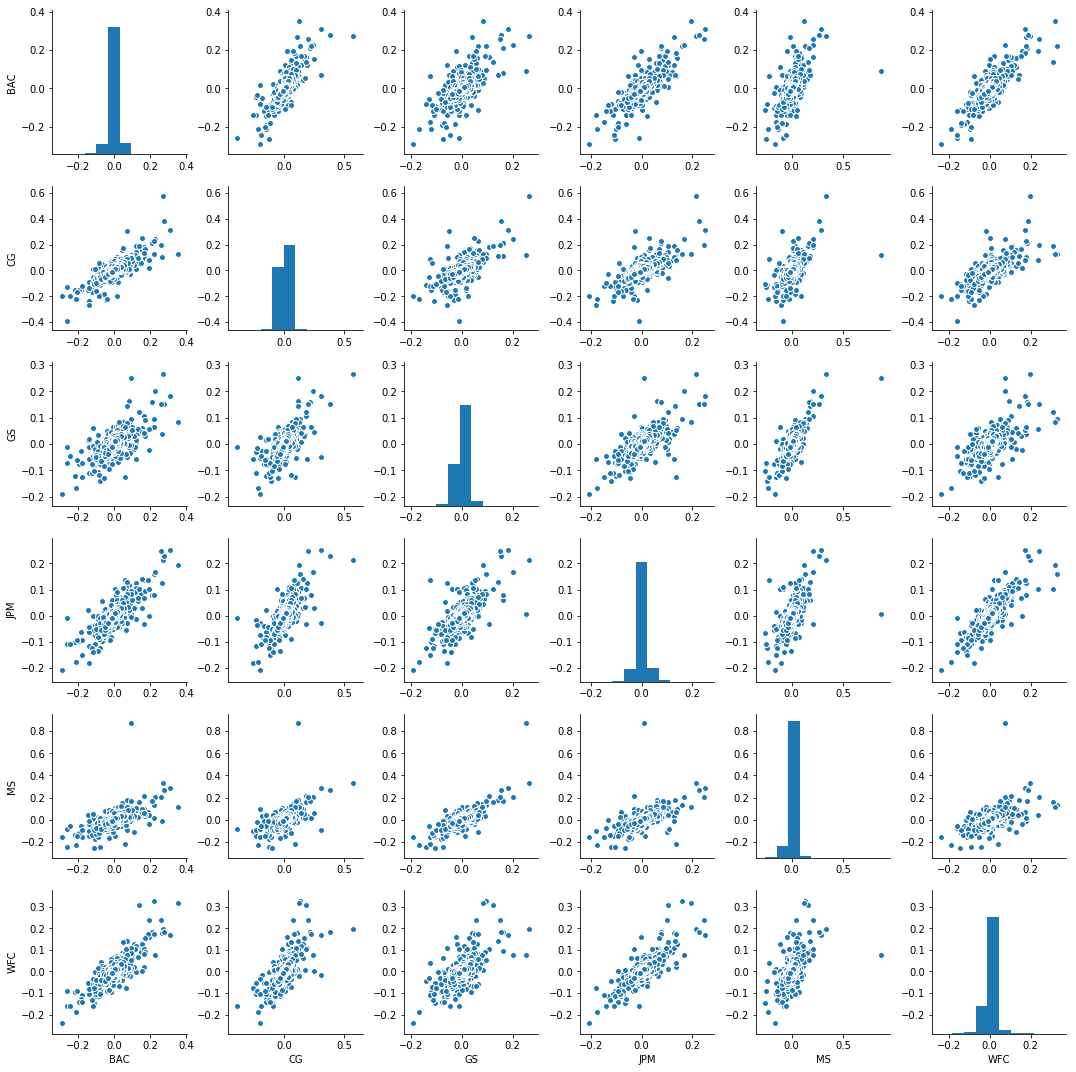

In [39]:

sns.pairplot(pctx.dropna())

In [140]:
pctx.idxmin()

Bank Ticker
BAC   2009-01-20
CG    2009-02-27
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

* See solution for details about Citigroup behavior....

In [144]:
pctx.idxmax()

Bank Ticker
BAC   2009-04-09
CG    2008-11-24
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

In [145]:
pctx.std()

Bank Ticker
BAC    0.036647
CG     0.038672
GS     0.025390
JPM    0.027667
MS     0.037819
WFC    0.030238
dtype: float64

In [148]:
pctx.ix['2015-01-01':'2015-12-31'].std()
#Use the rows like row numbers in a normal index

Bank Ticker
BAC    0.016163
CG     0.015289
GS     0.014046
JPM    0.014017
MS     0.016249
WFC    0.012591
dtype: float64

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [40]:
pctx.head()

Bank Ticker,BAC,CG,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [100]:
pctx.max().head()



Bank Ticker
BAC    0.352691
CG     0.578249
GS     0.264678
JPM    0.250967
MS     0.869835
dtype: float64

In [101]:
pctx.min().head()

Bank Ticker
BAC   -0.289694
CG    -0.390244
GS    -0.189596
JPM   -0.207274
MS    -0.258929
dtype: float64

In [119]:
pctx.xs('BAC',axis=1).argmax()

Timestamp('2009-04-09 00:00:00')

In [139]:
datey  = datetime.datetime(2015,1,1,0,0)


AttributeError: type object 'datetime.datetime' has no attribute 'datetime'


** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [137]:
xx = pctx.xs('MS',axis=1).index[2]

datetime.fromtimestamp(xx,timezone.utc)

TypeError: an integer is required (got type Timestamp)

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [68]:
pctx.xs('MS',axis=1)

Date
2006-01-03         NaN
2006-01-04    0.000686
2006-01-05    0.002742
2006-01-06    0.001025
2006-01-09    0.010586
2006-01-10    0.000507
2006-01-11    0.005910
2006-01-12   -0.001679
2006-01-13   -0.001513
2006-01-17   -0.009599
2006-01-18   -0.006121
2006-01-19    0.015398
2006-01-20   -0.025274
2006-01-23    0.010890
2006-01-24    0.003591
2006-01-25    0.008179
2006-01-26    0.013520
2006-01-27    0.013507
2006-01-30   -0.001810
2006-01-31    0.012856
2006-02-01    0.006184
2006-02-02   -0.009057
2006-02-03    0.002775
2006-02-06    0.004720
2006-02-07   -0.019440
2006-02-08    0.012225
2006-02-09   -0.001469
2006-02-10   -0.014220
2006-02-13   -0.008290
2006-02-14    0.004347
                ...   
2015-11-18    0.019649
2015-11-19   -0.002336
2015-11-20   -0.007609
2015-11-23   -0.007962
2015-11-24   -0.001486
2015-11-25    0.000595
2015-11-27    0.005058
2015-11-30    0.015394
2015-12-01    0.028280
2015-12-02   -0.010774
2015-12-03   -0.012611
2015-12-04    0.025254
2015-1

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

[(-0.08, 0.08)]

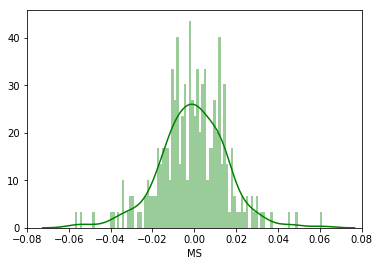

In [151]:

sns.distplot(pctx.ix['2015-01-01':'2015-12-31']['MS'],color='green',bins=100).set(xlim=(-.08,.08
                                                             ))

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



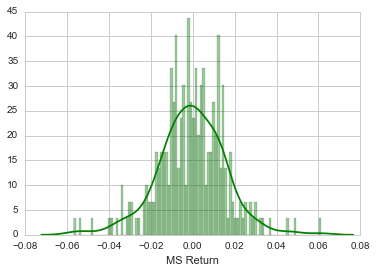

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

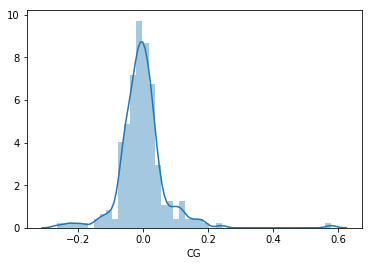

In [153]:
sns.distplot(pctx.ix['2008-01-01':'2008-12-31']['CG'])

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



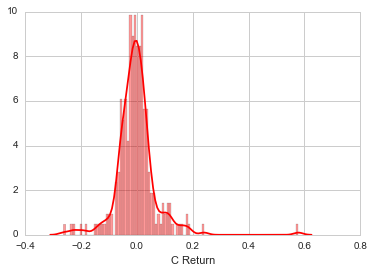

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

TypeError: xs() missing 1 required positional argument: 'key'

In [178]:
p


#sns.pointplot(x='Date',y=pctx.xs())

NameError: name 'p' is not defined

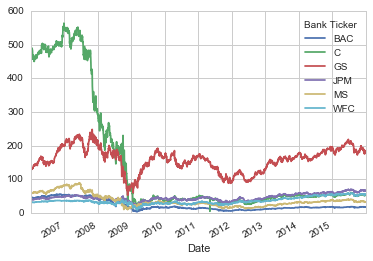

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

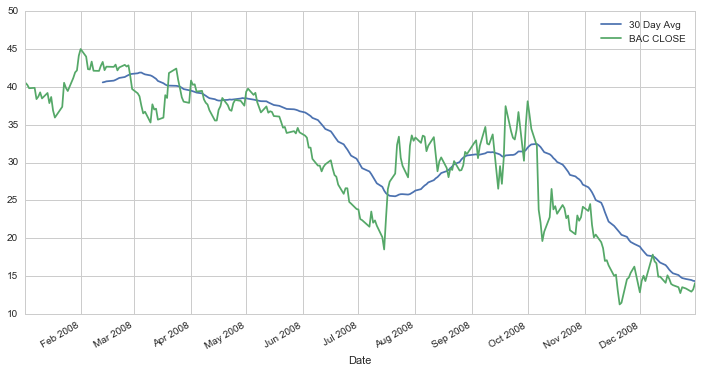

** Create a heatmap of the correlation between the stocks Close Price.**

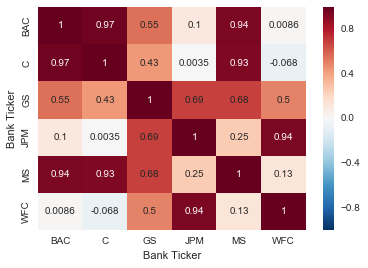

** Optional: Use seaborn's clustermap to cluster the correlations together:**

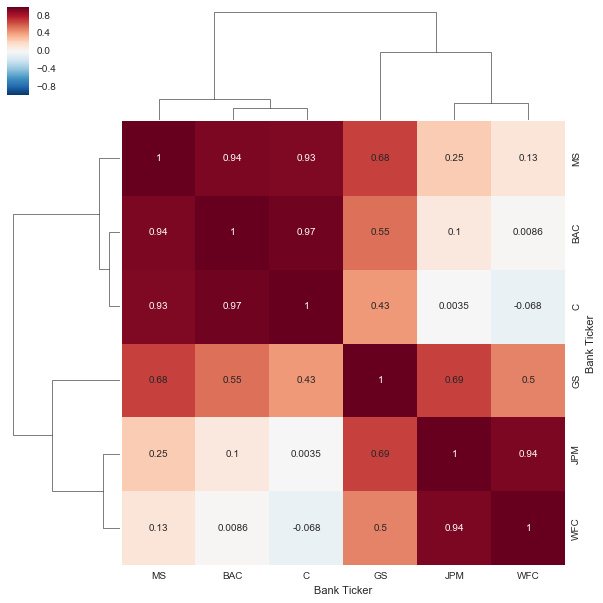

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.